<a href="https://colab.research.google.com/github/camilafaiza26/kelompok8_project_1/blob/main/Mutiple_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Membaca the dataset
dataset = pd.read_csv("Real estate.csv")

In [3]:
#Menampilkan dataset baris awal
dataset.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
#Menetapkan nilai untuk X dan Y
x = dataset[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']]
y = dataset['Y house price of unit area']

In [5]:
#Splitting dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [6]:
#instal linear Regresi
!pip install LinearRegression

In [7]:
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [8]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  44.06376874315815
Coefficients:


[('X2 house age', -0.2706527343431213),
 ('X3 distance to the nearest MRT station', -0.00541171015129677),
 ('X4 number of convenience stores', 1.2023946019919578)]

In [9]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [43.73105144 34.94029984 52.66362068 39.19262714 49.93279514 32.73772637
 47.63276836 49.93279514 49.69251719 32.37150651 35.52052736 44.07129495
 40.90818532 31.83755244 48.23613715 38.18034981 52.00279288 42.579899
 33.19701196 29.41536742 12.67580649 43.23577334 36.84650106 50.15038737
 30.37848794 33.13999403 24.6085736  41.22651516 40.20851498 40.20970156
 53.09025715 38.07154496 43.26599318 44.15249077 30.25355676 47.1166474
 36.36112229 17.45318607 46.99610353 52.46688978 44.22746448 43.30687175
 33.87172298 34.57645668 40.19804188 44.1254255  40.9561024  30.88938107
 40.79216697 47.35116699 40.6599053  33.84419606 39.29683205 38.55610494
 49.69251719 45.06083919 47.20799163 34.6576525  47.94839019 31.90254831
 38.83677826 46.96990932 48.12787605 36.64299559 39.13444041 46.34653697
 48.29026769 44.69379624 38.25840815 48.97865706  6.26734192 33.20328057
 44.07129495 47.31625272 47.26212218 33.93860629 47.4831657  33.9786862
 40.10025389 26.0934267  40.88

In [10]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
121,48.0,43.731051
353,31.3,34.940300
96,59.5,52.663621
43,34.1,39.192627
125,48.6,49.932795


In [11]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 53.98
Mean Absolute Error: 5.804518711915056
Mean Square Error: 54.07249030357482
Root Mean Square Error: 7.353399914568418


Text(0.5, 1.0, 'Actual vs Predicted')

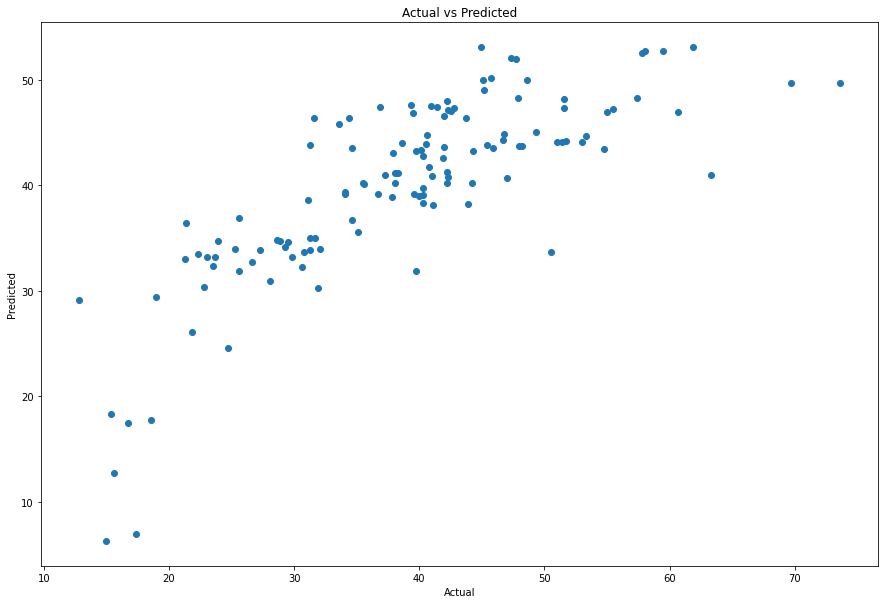

In [12]:
#Grafil
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_mlr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')